# Logistic Regression Using Newton's Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# creating data 
mean_01 = np.array([0.0, 1.0])
cov_01 = np.array([[1.5, 0.1], [0.1, 1.4]])
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_01 = np.hstack((dist_01, np.zeros((dist_01.shape[0], 1))))

mean_02 = np.array([5.0, 6.0])
cov_02 = np.array([[1.5, 0.1], [0.1, 1.4]])
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)
dist_02 = np.hstack((dist_02, np.ones((dist_01.shape[0], 1))))

data = np.vstack((dist_01, dist_02))
data = np.hstack((np.ones((data.shape[0], 1)), data))
np.random.shuffle(data)

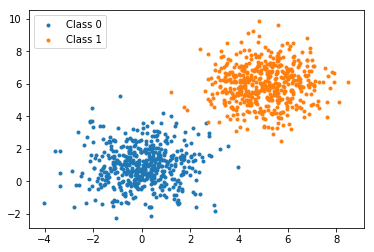

In [3]:
# visualising data
plt.scatter(dist_01[:, 0], dist_01[:, 1], marker = '.', label = 'Class 0')
plt.scatter(dist_02[:, 0], dist_02[:, 1], marker = '.', label = 'Class 1')
plt.legend()
plt.show()

In [4]:
# train-test-split
split_factor = 0.85
split = int(split_factor*data.shape[0])

X_train = data[:split, :-1]
y_train = data[:split, -1].reshape((-1, 1)).astype(np.int)
X_test = data[split: , :-1]
y_test = data[split: , -1].reshape((-1, 1)).astype(np.int)

In [5]:
# Newton's method
def sigmoid(z):
    return (1.0 / (1.0 + np.exp(-1*z)))

def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

def hessian(X, theta):
    m = X.shape[0]
    h = hypothesis(X, theta)
    D = np.zeros((m, m))
    for i in range(m):
        D[i][i] = h[i]*(1 - h[i])
    return np.dot(np.dot(X.transpose(), D), X)

def gradient(X, y, theta):
    h = hypothesis(X, theta)
    return np.dot(X.transpose(), (h - y))

def likelihood(X, y, theta):
    h = hypothesis(X, theta)
    l = 0.0
    for i in range(y.shape[0]):
        if(y[i] == 0):
            l += np.log(1 - h[i])
        else:
            l += np.log(h[i])
    return l

def error(X, y, theta):
    err = (-1*likelihood(X, y, theta))
    return err

def NewtonsMethod(X, y):
    theta = np.zeros((X.shape[1], 1))
    error_list = []
    likelihood_list = []
    max_itr = 15
    for itr in range(max_itr):
        H = hessian(X, theta)
        theta = theta - np.dot(np.linalg.inv(H), gradient(X, y, theta))
        likelihood_list.append(theta[0])
        error_list.append(error(X, y, theta))
    return theta, likelihood_list, error_list

In [6]:
theta, likelihood_list, error_list = NewtonsMethod(X_train, y_train)
print("Bias = ", theta[0])
print("Coefficients = ", theta[1:].reshape((1, -1)))

Bias =  [-102.81958828]
Coefficients =  [[13.54989392 19.77872346]]


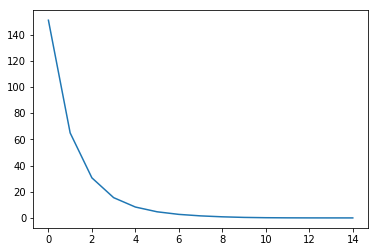

In [7]:
# visualising change in error
plt.plot(error_list)
plt.show()

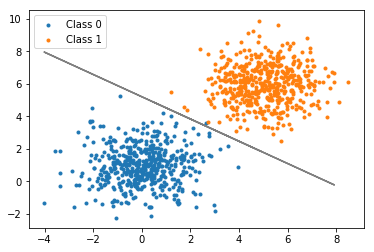

In [8]:
# visualising decision boundary
x1 = X_train[:, 1]
x2 = -1*((theta[0] + theta[1]*x1) / theta[2])

plt.scatter(dist_01[:, 0], dist_01[:, 1], marker = '.', label = 'Class 0')
plt.scatter(dist_02[:, 0], dist_02[:, 1], marker = '.', label = 'Class 1')
plt.legend()
plt.plot(x1, x2, color = 'gray')
plt.show()

In [9]:
# predicting output for X_test and computing accuracy of prediction
def predict(X, theta):
    confidence = hypothesis(X, theta)
    y_pred = np.round(confidence).astype(np.int)
    return y_pred
y_pred = predict(X_test, theta)

accuracy_score = np.sum(y_pred == y_test) / y_test.shape[0]
print("Accuracy score = ", accuracy_score)

Accuracy score =  0.9933333333333333
